In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from unc_tools import UncRegression
import os

UncRegression.latex_style(True)


SAVE_DIR = os.path.expanduser("~/Obsidian/physha_practice/Квазистационар и квазиравновесие/")
def savefig(name, path= "", fig=None, bbox_inches = None, **kwargs):
    os.makedirs(SAVE_DIR, exist_ok=True)
    if bbox_inches is None:
        bbox_inches = "tight"
    if fig is None:
        fig = plt.gcf()
    new_path = os.path.join(SAVE_DIR, name)
    fig.savefig(new_path, bbox_inches = bbox_inches, **kwargs)
    fig.savefig(os.path.join(".", path, name), bbox_inches = bbox_inches, **kwargs)

UncRegression.latex_style(True)

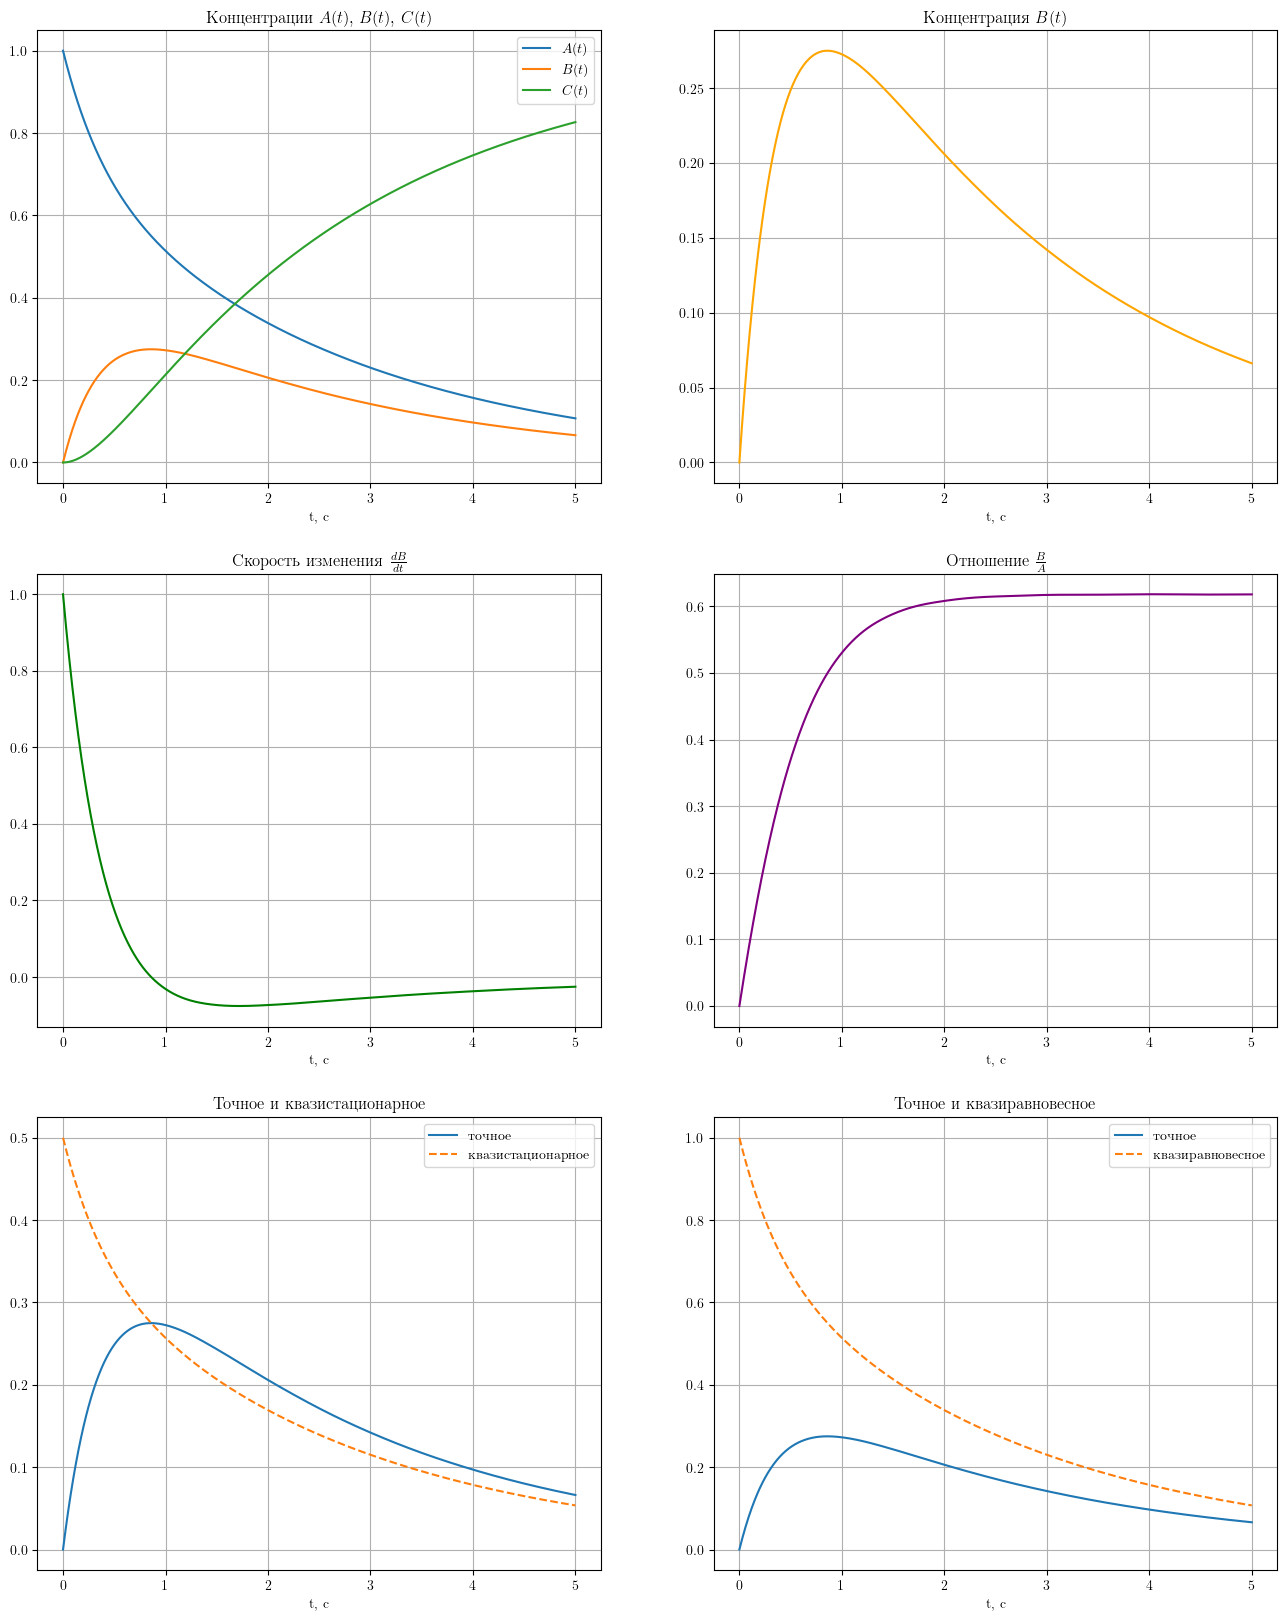

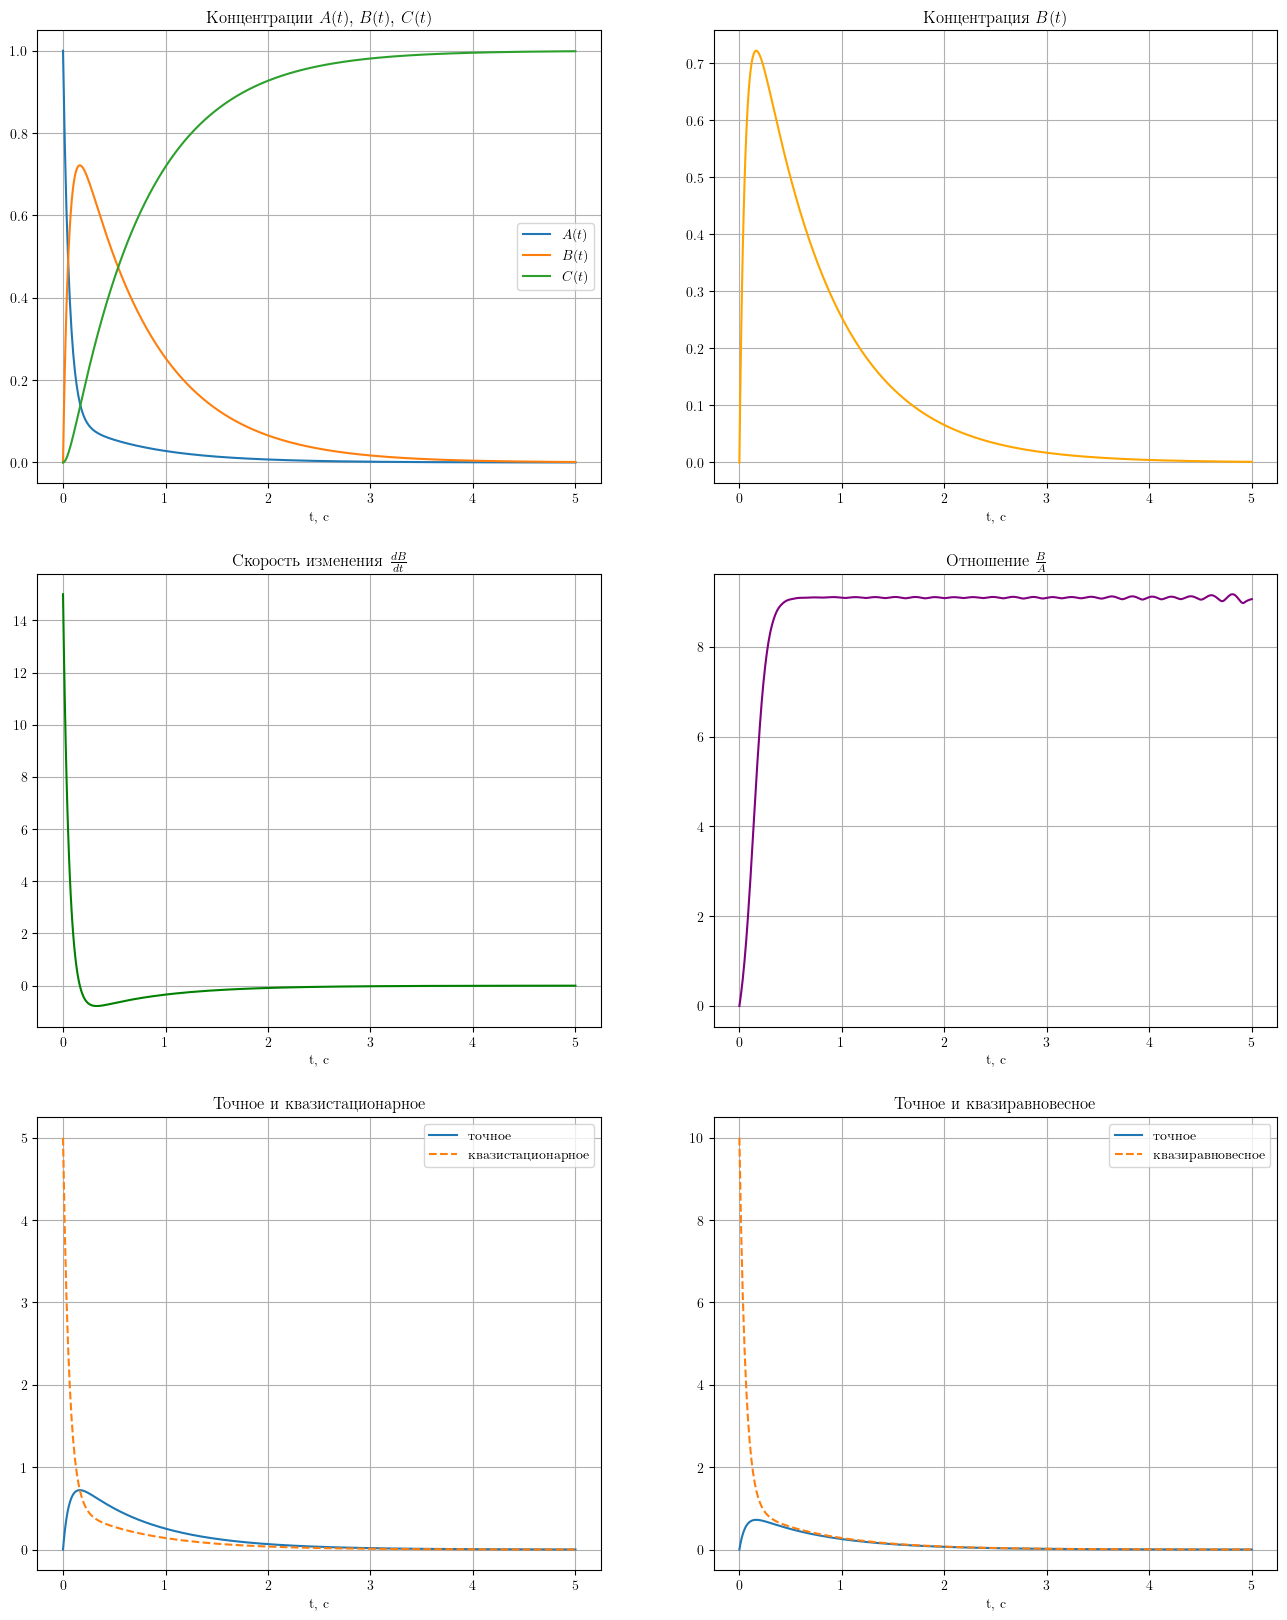

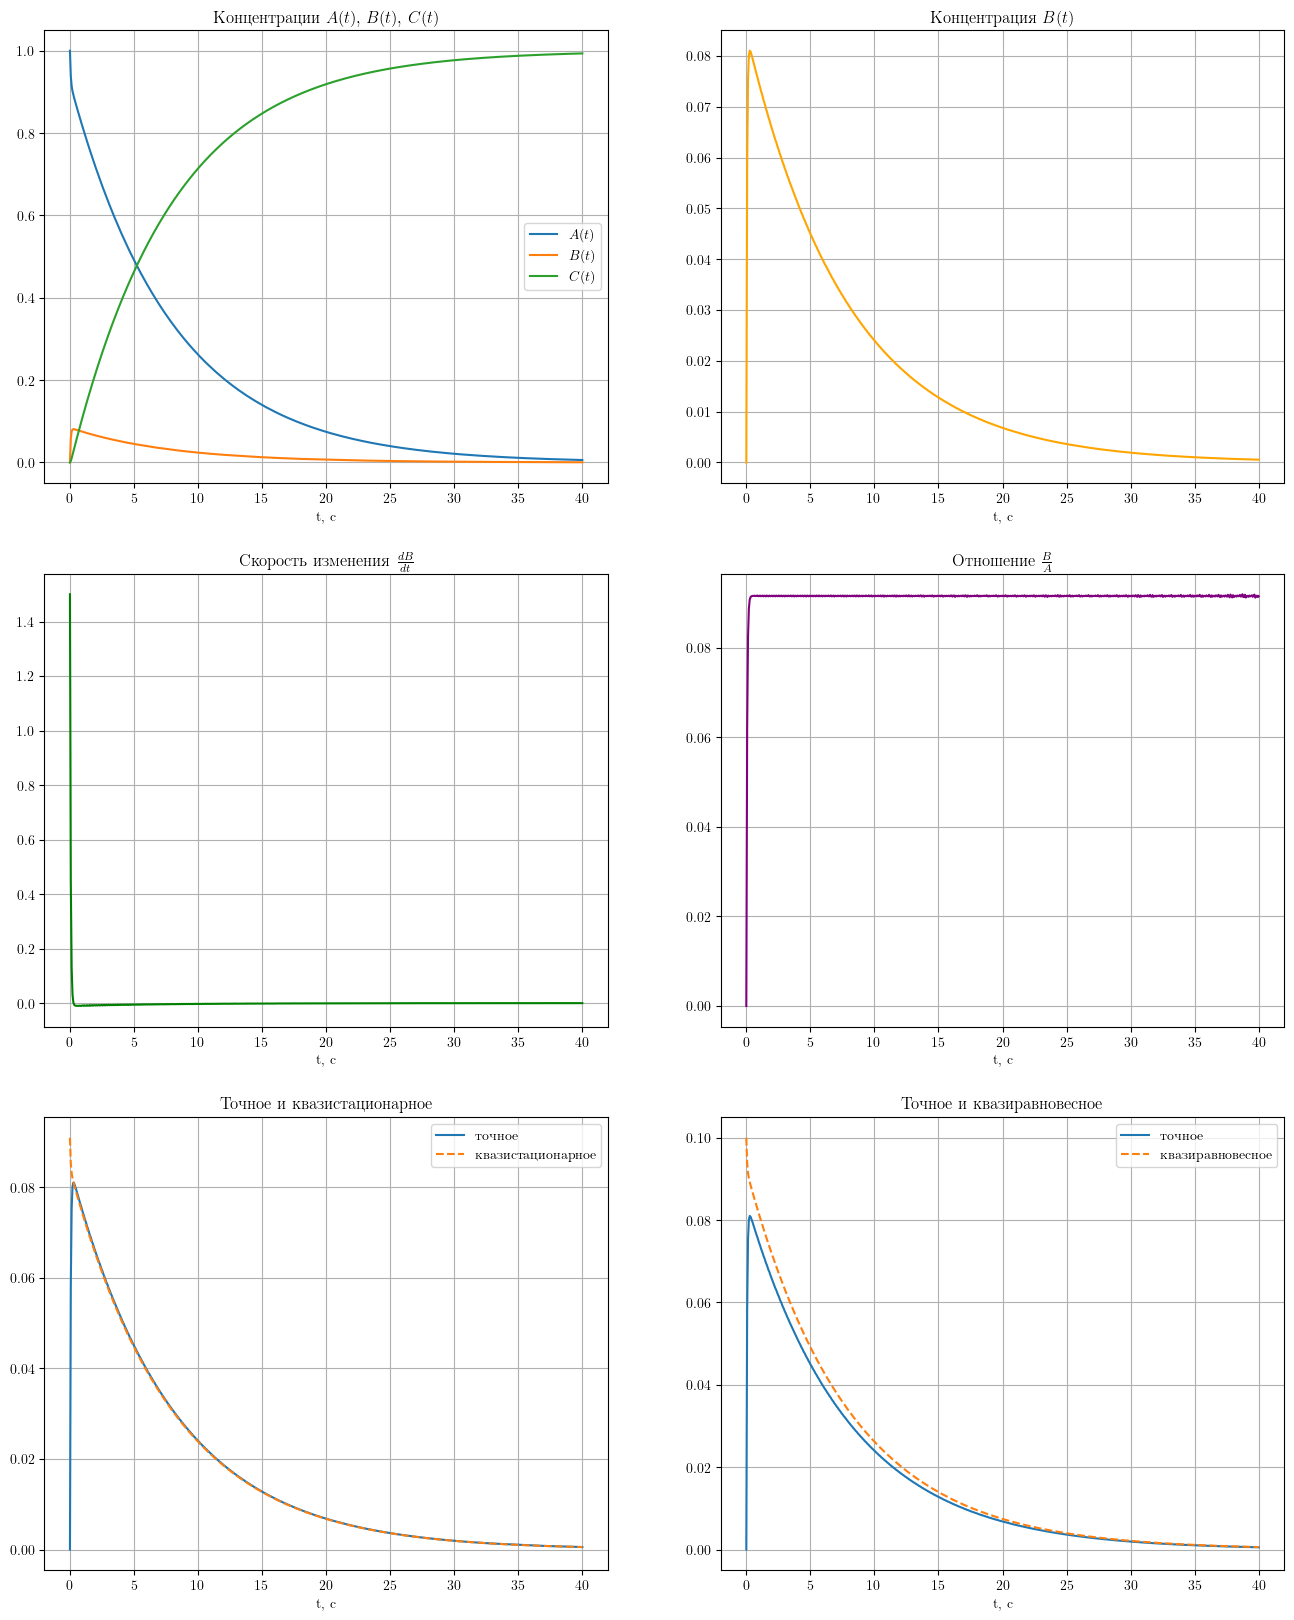

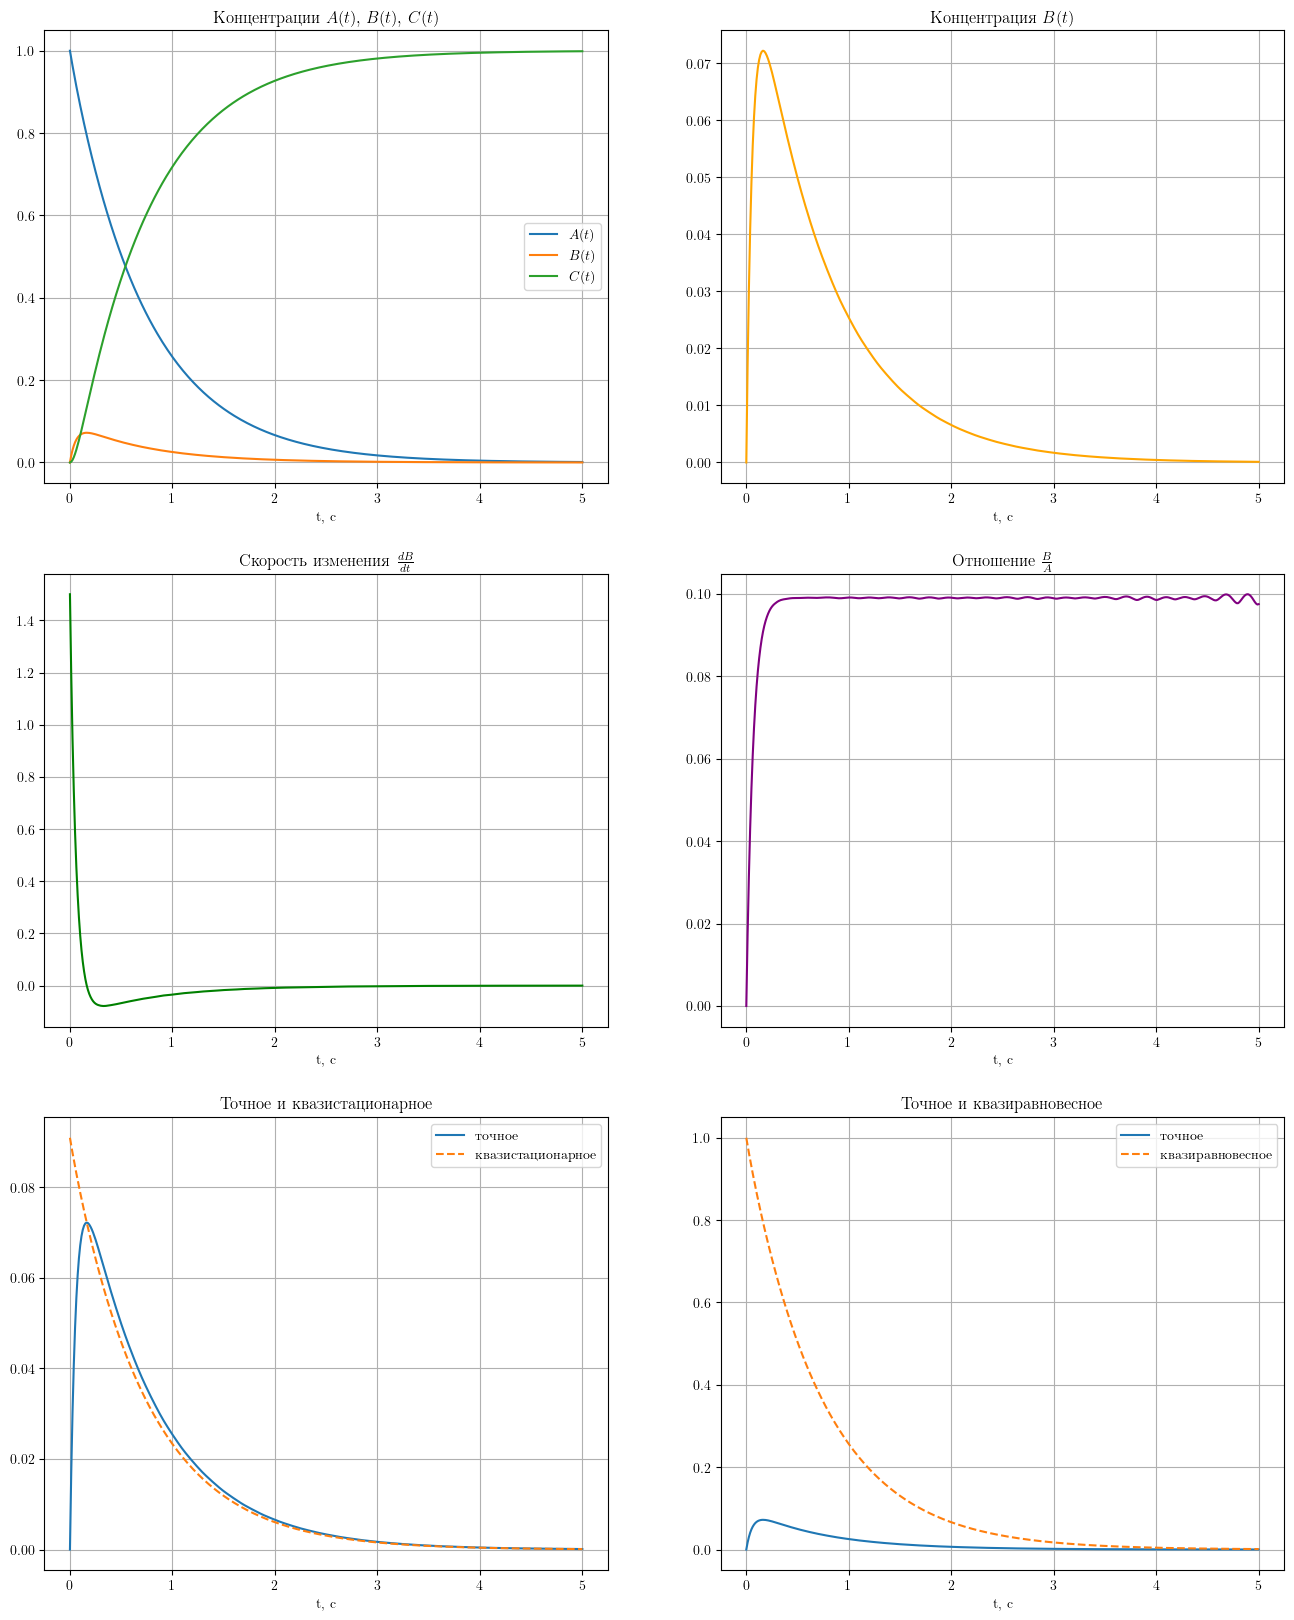

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from unc_tools import UncRegression
UncRegression.latex_style(True)


def kinetics(t, y, k1, k2, k3):
    A, B, C = y
    dA = -k1*A + k2*B
    dB = k1*A - (k2 + k3)*B
    dC = k3*B
    return [dA, dB, dC]


def run_case_grid(title, k1, k2, k3, t_max, n_points=1000):

    t_eval = np.linspace(0, t_max, n_points)
    y0 = [1.0, 0.0, 0.0]

    sol = solve_ivp(kinetics, (0, t_max), y0, t_eval=t_eval, args=(k1, k2, k3))
    t = sol.t
    A, B, C = sol.y

    dBdt = k1*A - (k2 + k3)*B

    ratio = np.zeros_like(B)
    mask = A > 1e-5
    ratio[mask] = B[mask] / A[mask]
    
    B_qs = (k1 / (k2 + k3)) * A

    B_eq = (k1 / k2) * A


    # --- сетка 3×2 ---
    fig, axes = plt.subplots(3, 2, figsize=(16, 20))
    fig.suptitle(title, fontsize=24)

    for ax in axes.flatten():
        ax.grid()
        ax.set_xlabel("t, c")

    axes = axes.flatten()


    ax = axes[0]
    ax.plot(t, A, label=r"$A(t)$")
    ax.plot(t, B, label=r"$B(t)$")
    ax.plot(t, C, label=r"$C(t)$")
    ax.set_title("Концентрации " + r"$A(t)$, $B(t)$, $C(t)$")
    ax.legend()

    ax = axes[1]
    ax.plot(t, B, color='orange')
    ax.set_title("Концентрация " + r"$B(t)$")

    ax = axes[2]
    ax.plot(t, dBdt, color='green')
    ax.set_title("Скорость изменения " + r"$\frac{dB}{dt}$")

    ax = axes[3]
    ax.plot(t, ratio, color='purple')
    ax.set_title("Отношение " + r"$\frac{B}{A}$")


    ax = axes[4]
    ax.plot(t, B, label="точное")
    ax.plot(t, B_qs, '--', label="квазистационарное")
    ax.set_title("Точное и квазистационарное")
    ax.legend()


    ax = axes[5]
    ax.plot(t, B, label="точное")
    ax.plot(t, B_eq, '--', label="квазиравновесное")
    ax.set_title("Точное и квазиравновесное")
    ax.legend()




run_case_grid(
    title="",#r"$k_1 = k_2 = k_3 = 1$",
    k1=1.0, k2=1.0, k3=1.0, t_max=5.0
)
savefig("case1")


run_case_grid(
    title="",#r"$k_1 \gg k_2, k_3\ (k_1=15,\ k_2=1.5,\ k_3=1.5)$",
    k1=15.0, k2=1.5, k3=1.5, t_max=5.0, n_points=600
)
savefig("case2")


run_case_grid(
    title="",#r"$k_2 \gg k_1, k_3\ (k_1=1.5,\ k_2=15,\ k_3=1.5)$",
    k1=1.5, k2=15.0, k3=1.5, t_max=40.0, n_points=600
)
savefig("case3")


run_case_grid(
    title="",#r"$k_3 \gg k_1, k_2\ (k_1=1.5,\ k_2=1.5,\ k_3=15)$",
    k1=1.5, k2=1.5, k3=15.0, t_max=5.0, n_points=400
)
savefig("case4")
